### Stock Market Prediction And Forecasting Using Stacked LSTM

In [4]:
### Keras and Tensorflow >2.0

In [5]:
import pandas as pd, numpy as np
import yfinance as yf, matplotlib.pyplot as plt


In [6]:
df = yf.download(tickers='AAPL',start='2018-12-1', end='2024-12-1')
df

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2018-12-03,44.131859,46.205002,46.235001,45.302502,46.115002,163210000
2018-12-04,42.190556,44.172501,45.597500,44.067501,45.237499,165377200
2018-12-06,41.720158,43.680000,43.695000,42.605000,42.939999,172393600
2018-12-07,40.232540,42.122501,43.622501,42.075001,43.372501,169126400
2018-12-10,40.497585,42.400002,42.522499,40.832500,41.250000,248104000
...,...,...,...,...,...,...
2024-11-22,229.869995,229.869995,230.720001,228.059998,228.059998,38168300
2024-11-25,232.869995,232.869995,233.250000,229.740005,231.460007,90152800


In [7]:
df.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2018-12-03,44.131859,46.205002,46.235001,45.302502,46.115002,163210000
2018-12-04,42.190556,44.172501,45.597500,44.067501,45.237499,165377200
2018-12-06,41.720158,43.680000,43.695000,42.605000,42.939999,172393600
2018-12-07,40.232540,42.122501,43.622501,42.075001,43.372501,169126400
2018-12-10,40.497585,42.400002,42.522499,40.832500,41.250000,248104000


In [8]:
df.tail()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2024-11-22,229.869995,229.869995,230.720001,228.059998,228.059998,38168300
2024-11-25,232.869995,232.869995,233.250000,229.740005,231.460007,90152800
2024-11-26,235.059998,235.059998,235.570007,233.330002,233.330002,45986200
2024-11-27,234.929993,234.929993,235.690002,233.809998,234.470001,33498400
2024-11-29,237.330002,237.330002,237.809998,233.970001,234.809998,28481400


In [9]:
df1=df.reset_index()['Close']

In [10]:
df1

Ticker,AAPL
0,46.205002
1,44.172501
2,43.680000
3,42.122501
4,42.400002
...,...
1503,229.869995
1504,232.869995
1505,235.059998
1506,234.929993


In [11]:
df.rename(columns={'AAPL': 'Close'}, inplace=True)


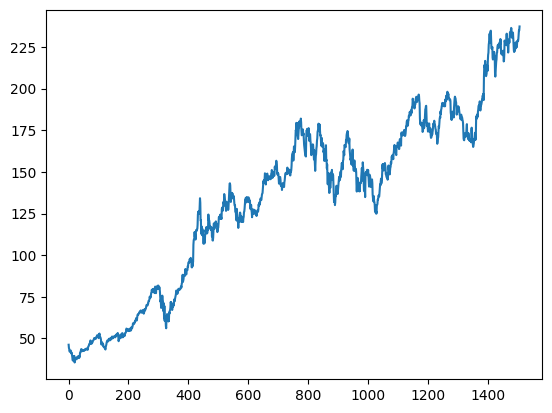

In [ ]:
plt.plot(df1)

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [17]:
print(df1)

[[0.05281678]
 [0.04274404]
 [0.0403033 ]
 ...
 [0.98875024]
 [0.98810596]
 [1.        ]]


In [18]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [19]:
training_size,test_size

(980, 528)

In [20]:
train_data

array([[0.05281678],
       [0.04274404],
       [0.0403033 ],
       [0.03258459],
       [0.03395984],
       [0.03275805],
       [0.03334036],
       [0.03563242],
       [0.02885532],
       [0.02694733],
       [0.02958632],
       [0.02316851],
       [0.01813834],
       [0.01058069],
       [0.00574876],
       [0.01855958],
       [0.01729584],
       [0.01739496],
       [0.0192658 ],
       [0.0194888 ],
       [0.        ],
       [0.00752046],
       [0.00711161],
       [0.01060548],
       [0.0137772 ],
       [0.0143843 ],
       [0.01251346],
       [0.00967626],
       [0.01347987],
       [0.01579671],
       [0.01693655],
       [0.01812596],
       [0.01376482],
       [0.01453297],
       [0.01302144],
       [0.01929056],
       [0.0174817 ],
       [0.01547457],
       [0.02857036],
       [0.03004473],
       [0.03014385],
       [0.03600411],
       [0.03963425],
       [0.0397086 ],
       [0.03562004],
       [0.03496339],
       [0.0337492 ],
       [0.035

In [21]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [22]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [23]:
print(X_train.shape), print(y_train.shape)

(879, 100)
(879,)


(None, None)

In [24]:
print(X_test.shape), print(ytest.shape)

(427, 100)
(427,)


(None, None)

In [25]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [26]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [27]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 13s 251ms/step - loss: 0.0482 - val_loss: 0.0433
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 163ms/step - loss: 0.0041 - val_loss: 0.0209
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 158ms/step - loss: 0.0022 - val_loss: 0.0072
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 167ms/step - loss: 0.0012 - val_loss: 0.0044
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step - loss: 0.0013 - val_loss: 0.0045
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step - loss: 0.0011 - val_loss: 0.0045
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step - loss: 0.0011 - val_loss: 0.0042
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - loss: 0.0011 - val_loss: 0.0048
Epoch 9/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step - loss: 0.0011 - val_loss: 0.0046
Epoch 10/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step - loss: 0.0010 - val_loss: 0.0034
Epoch 11/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step - loss: 0.0010 - val_loss: 0.0037
Epoch 12/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 

In [31]:
import tensorflow as tf

In [33]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [34]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [35]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

120.00134992350402

In [36]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

187.23909097590192

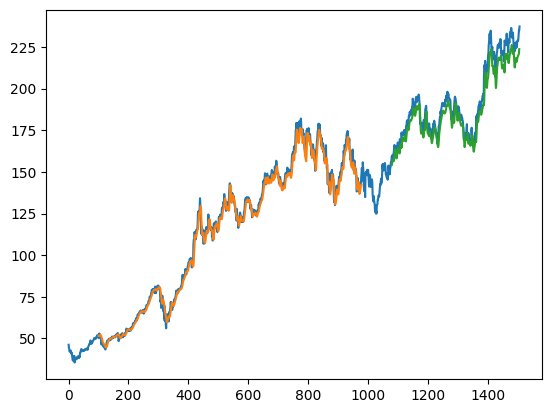

In [37]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [38]:
len(test_data)

528

In [39]:
x_input=test_data[428:].reshape(1,-1)
x_input.shape


(1, 100)

In [40]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [41]:
temp_input

[0.9516311154446403,
 0.9663498643150666,
 0.9854793754817938,
 0.9875608910998156,
 0.958123242118999,
 0.9348307753362103,
 0.9354750575808352,
 0.933740562059126,
 0.938944124244235,
 0.9068798908168455,
 0.9016763286317365,
 0.9040055753100155,
 0.9053932019753755,
 0.9081684553060952,
 0.9244235753460105,
 0.9059878775119635,
 0.9134216241992411,
 0.8609393907358566,
 0.8508294528939692,
 0.8636651129785214,
 0.8809609152074657,
 0.8954815397256718,
 0.9018745286039388,
 0.9204093642340777,
 0.9226394731162647,
 0.9375069664908199,
 0.9440982309612705,
 0.9433052798324987,
 0.9463778709315126,
 0.9458327264829797,
 0.936565346477901,
 0.9480133042771116,
 0.9496982687107655,
 0.9539107554148823,
 0.9462788087554025,
 0.9626329909714278,
 0.958717917655587,
 0.9278431109213553,
 0.9183279242360377,
 0.9259103398074625,
 0.9181792553518907,
 0.9186252620043319,
 0.914660581980454,
 0.9272979664728224,
 0.9278431109213553,
 0.9265050153440505,
 0.895878015290058,
 0.8982071863483551,

In [42]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.9476874]
101
1 day input [0.96634986 0.98547938 0.98756089 0.95812324 0.93483078 0.93547506
 0.93374056 0.93894412 0.90687989 0.90167633 0.90400558 0.9053932
 0.90816846 0.92442358 0.90598788 0.91342162 0.86093939 0.85082945
 0.86366511 0.88096092 0.89548154 0.90187453 0.92040936 0.92263947
 0.93750697 0.94409823 0.94330528 0.94637787 0.94583273 0.93656535
 0.9480133  0.94969827 0.95391076 0.94627881 0.96263299 0.95871792
 0.92784311 0.91832792 0.92591034 0.91817926 0.91862526 0.91466058
 0.92729797 0.92784311 0.92650502 0.89587802 0.89820719 0.91753497
 0.95807364 0.95475324 0.94617967 0.95063989 0.94568406 0.95138331
 0.95272133 0.97854124 0.94489118 0.94771597 0.94221499 0.9478151
 0.9224908  0.9427106  0.96139403 0.95891612 0.95153198 0.97011634
 0.98275373 0.97249512 0.97432876 0.9884529  0.99578751 0.99271492
 0.96744015 0.96649861 0.97066149 0.98052354 0.98186164 0.96416936
 0.94340442 0.92853692 0.92407663 0.93121304 0.9275953  0.95118503
 0.94860806 0.93507858 0.93507858 0.

In [43]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [44]:
import matplotlib.pyplot as plt

In [45]:
len(df1)

1508

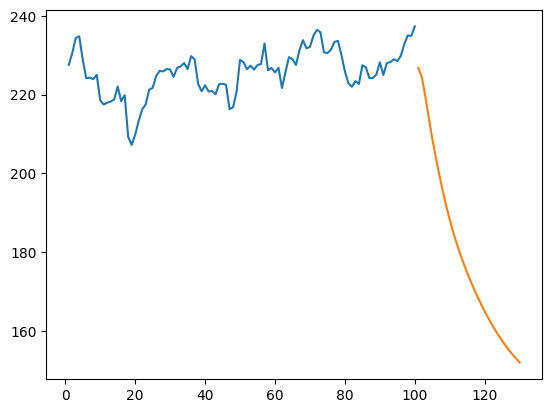

In [46]:
plt.plot(day_new,scaler.inverse_transform(df1[1408:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

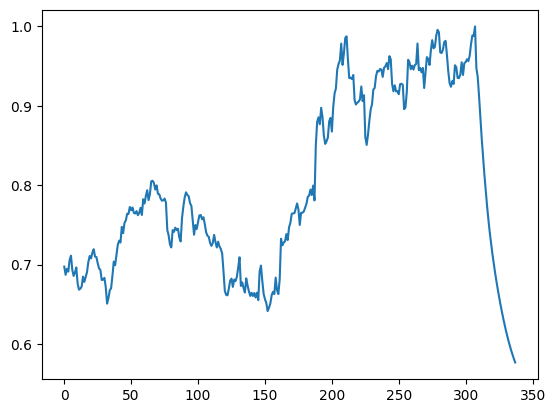

In [47]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [48]:
from datetime import date

actual_df = yf.download(tickers='AAPL',start='2024-12-1',end=date.today())

[*********************100%***********************]  1 of 1 completed

1 Failed download:
['AAPL']: ConnectionError(MaxRetryError('HTTPSConnectionPool(host=\'query2.finance.yahoo.com\', port=443): Max retries exceeded with url: /v8/finance/chart/%ticker%?period1=1733029200&period2=1734584400&interval=1d&includePrePost=False&events=div%2Csplits%2CcapitalGains&crumb=B0dun1mLmMf (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x0000015B5C24A2A0>: Failed to resolve \'query2.finance.yahoo.com\' ([Errno 11001] getaddrinfo failed)"))'))


In [49]:
df3=scaler.inverse_transform(df3).tolist()

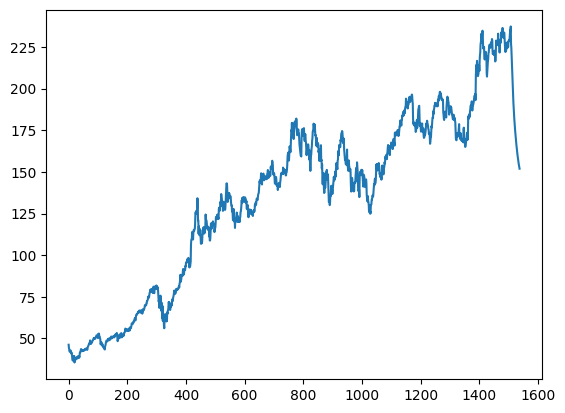

In [50]:
plt.plot(df3)

In [51]:
df1.columns()

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

TypeError: list indices must be integers or slices, not str

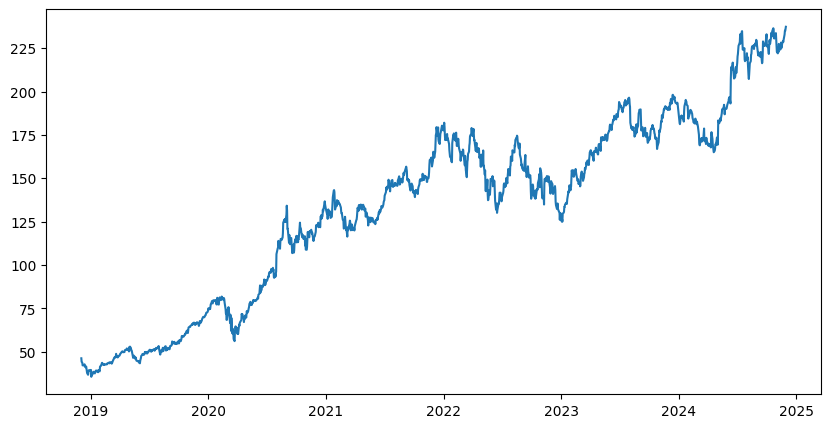

In [105]:
plt.figure(figsize=(10, 5))
plt.plot(df['Close'], label='Observed')

plt.plot(df3['Close'],label='Actual',color='Black')
plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()